# DSA-S20 - Model pipeline assignment by Prasanthi

In [2]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import accuracy

from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import os
import matplotlib.pyplot as plt

1st pipeline : Load data, Train test split, model training, prediction, evaluation.

2nd pipeline : Load data, cross validation.

Benchmark the User based and item based collaborative filtering models using the cosine and pearson correlation similarity metrics. In this step you need to use the data loaded in the 1st step.

Notebook :

Your notebook should be leasable, well organized and commented. It should contain 3 seperate parts :

Data loading
Model pipelines
Model benchmarking

# 1st Pipeline

# Data load

In [3]:
# path to dataset file
file_path = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/Rating.data')

In [4]:
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep='\t')

In [5]:
data = Dataset.load_from_file(file_path, reader=reader)

In [6]:
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8736  0.8655  0.8792  0.8760  0.8706  0.8730  0.0047  
MAE (testset)     0.6738  0.6684  0.6777  0.6768  0.6693  0.6732  0.0038  
Fit time          0.63    0.45    0.42    0.53    0.51    0.51    0.07    
Test time         0.33    0.40    0.32    0.26    0.26    0.31    0.05    


{'test_rmse': array([0.87356307, 0.86546468, 0.87919227, 0.87597736, 0.8706073 ]),
 'test_mae': array([0.67375043, 0.6683791 , 0.67774796, 0.67676915, 0.66926303]),
 'fit_time': (0.6313557624816895,
  0.4513561725616455,
  0.42446279525756836,
  0.5281713008880615,
  0.5133340358734131),
 'test_time': (0.32593512535095215,
  0.3976163864135742,
  0.32488012313842773,
  0.2617614269256592,
  0.2554028034210205)}

# Manual pipeline
# Split data in train and test

In [7]:
# sample random trainset and testset
# test set is made of 25% of the ratings.


from surprise.model_selection import train_test_split

#train, test = train_test_split(data, test_size=0.2, random_state=42)

trainset, testset = train_test_split(data, test_size=.25)

In [8]:
model = SVD()

In [9]:
trainset

In [10]:
testset

[('560', '8361', 2.5),
 ('175', '7169', 5.0),
 ('534', '87232', 2.5),
 ('290', '2947', 5.0),
 ('65', '46976', 3.5),
 ('372', '1208', 5.0),
 ('226', '4326', 4.0),
 ('414', '5679', 4.0),
 ('414', '2064', 3.0),
 ('474', '4164', 4.0),
 ('380', '51086', 3.0),
 ('563', '109895', 2.5),
 ('116', '2683', 0.5),
 ('414', '1127', 3.0),
 ('307', '7173', 3.5),
 ('20', '6297', 4.0),
 ('356', '3897', 5.0),
 ('129', '4226', 3.0),
 ('603', '2174', 4.0),
 ('156', '4226', 4.5),
 ('506', '48997', 3.5),
 ('580', '3785', 2.0),
 ('454', '53953', 2.5),
 ('100', '1290', 4.0),
 ('414', '1378', 4.0),
 ('68', '1345', 3.0),
 ('600', '2139', 4.0),
 ('414', '5449', 1.5),
 ('288', '13', 2.0),
 ('415', '1580', 3.5),
 ('603', '904', 5.0),
 ('181', '383', 1.0),
 ('122', '54995', 5.0),
 ('140', '2076', 3.0),
 ('312', '2163', 3.0),
 ('212', '65261', 3.5),
 ('202', '1275', 4.0),
 ('414', '3142', 4.0),
 ('266', '1080', 5.0),
 ('290', '2648', 5.0),
 ('275', '3471', 5.0),
 ('398', '31658', 4.0),
 ('434', '72998', 5.0),
 ('339'

# Train model with SVD

In [11]:
# We'll use the famous SVD algorithm.
algo = SVD()

In [12]:
algo.fit(trainset)

# Make predictions 

In [13]:

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Evaluation

In [14]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8758


0.8758324141303357

In [15]:
accuracy.mae(predictions)

MAE:  0.6733


0.6732974767676541

# Train model with KNNBasics

In [16]:
from surprise import KNNBasic
from surprise import Dataset

# We'll use the famous KNNBasic algorithm.
algo = KNNBasic()

# Make Predictions

In [17]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


# Evaluation

In [18]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9478


0.947755785627589

In [19]:
accuracy.mae(predictions)

MAE:  0.7265


0.726458870467285

# 2nd Pipeline

In [20]:
# path to dataset file
file_path = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/Rating.data')

In [21]:
reader = Reader(line_format='user item rating timestamp', sep='\t')

In [22]:
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8721  0.8675  0.8747  0.8745  0.8750  0.8728  0.0028  
MAE (testset)     0.6718  0.6712  0.6733  0.6726  0.6757  0.6729  0.0016  
Fit time          0.43    0.48    0.44    0.44    0.50    0.46    0.03    
Test time         0.26    0.42    0.37    0.24    0.26    0.31    0.07    


{'test_rmse': array([0.87213286, 0.86754084, 0.8747454 , 0.87447378, 0.87499745]),
 'test_mae': array([0.67178103, 0.67122516, 0.67329384, 0.67255937, 0.67569427]),
 'fit_time': (0.4327676296234131,
  0.47797131538391113,
  0.4396178722381592,
  0.4404873847961426,
  0.5012702941894531),
 'test_time': (0.2620542049407959,
  0.41840386390686035,
  0.37282323837280273,
  0.24076294898986816,
  0.26165032386779785)}

# Cross validation - SVD

In [23]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8682  0.8752  0.8765  0.8713  0.8781  0.8739  0.0036  
MAE (testset)     0.6668  0.6720  0.6747  0.6699  0.6761  0.6719  0.0033  
Fit time          16.25   19.67   19.56   15.04   15.41   17.19   2.02    
Test time         0.84    0.76    0.59    0.34    1.02    0.71    0.23    


{'test_rmse': array([0.86822213, 0.87515489, 0.87647662, 0.87133368, 0.87806785]),
 'test_mae': array([0.66680349, 0.67204701, 0.67472975, 0.66989625, 0.67607134]),
 'fit_time': (16.24595880508423,
  19.67416262626648,
  19.556977033615112,
  15.044286489486694,
  15.410595178604126),
 'test_time': (0.842308521270752,
  0.7557876110076904,
  0.5907413959503174,
  0.34220361709594727,
  1.0179164409637451)}

# Cross validation - KNNBasic

In [24]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8698  0.8732  0.8706  0.8793  0.8736  0.8733  0.0033  
MAE (testset)     0.6696  0.6711  0.6688  0.6741  0.6707  0.6709  0.0018  
Fit time          17.27   17.62   10.50   8.16    7.29    12.17   4.44    
Test time         0.67    0.50    0.43    0.36    0.23    0.44    0.15    


{'test_rmse': array([0.86984441, 0.87321378, 0.87055819, 0.87929352, 0.8735523 ]),
 'test_mae': array([0.66964137, 0.67107286, 0.66877   , 0.67405138, 0.67071687]),
 'fit_time': (17.271258115768433,
  17.624515771865845,
  10.49886965751648,
  8.162046194076538,
  7.286123037338257),
 'test_time': (0.6730380058288574,
  0.5010819435119629,
  0.43421339988708496,
  0.3639190196990967,
  0.22579360008239746)}

# 3. Benchmark

In [25]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

In [26]:

# The algorithms to cross-validate
classes = (SVD, KNNBasic)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = 'http://surprise.readthedocs.io/en/stable/'
LINK = {'SVD': '[{}]({})'.format('SVD',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD'),
       
        'KNNBasic': '[{}]({})'.format('k-NN',
                                      stable +
                                      'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic'),
        
        }



In [27]:
# set RNG
np.random.seed(0)
random.seed(0)

In [28]:
dataset = data
#data = Dataset.load_builtin(dataset)
from surprise.model_selection import KFold

kf = KFold(random_state=0)  # folds will be the same for all algorithms.

In [29]:
table = []

In [30]:
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

|:----------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD](http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) | 0.873 | 0.671 | 0:00:38 |
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
|:----------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [k-NN](http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic) | 0.947 | 0.726 | 0:00:15 |


In [31]:
header = ['LINK[dataset]',
          'RMSE',
          'MAE',
          'Time'
          ]

In [32]:
print(tabulate(table, header, tablefmt="pipe"))

| LINK[dataset]                                                                                                                     |   RMSE |   MAE | Time    |
|:----------------------------------------------------------------------------------------------------------------------------------|-------:|------:|:--------|
| [SVD](http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) |  0.873 | 0.671 | 0:00:38 |
| [k-NN](http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic)                   |  0.947 | 0.726 | 0:00:15 |


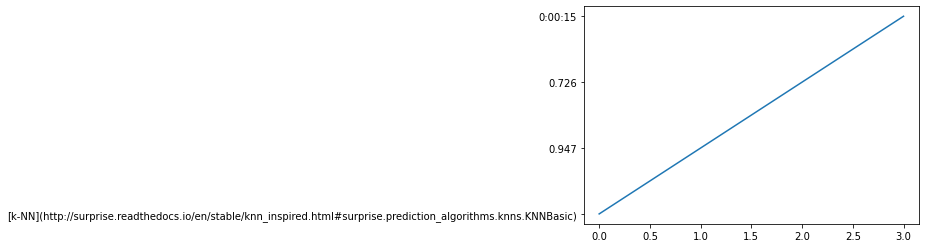

In [33]:
plt.plot(new_line)